<a href="https://colab.research.google.com/github/FeritMario/Obrada-slike-projekt/blob/main/Obrada%20slike.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving slik.png to slik (1).png
Prenesena datoteka: slik (1).png


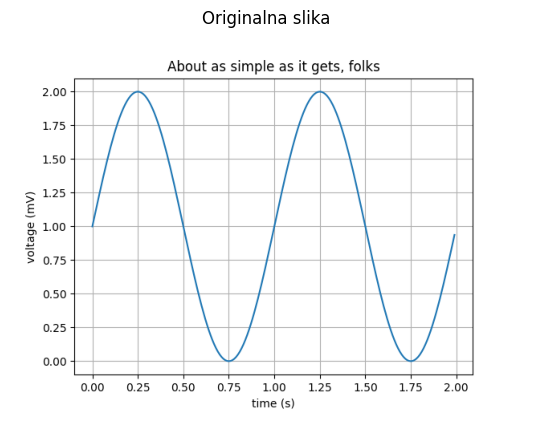

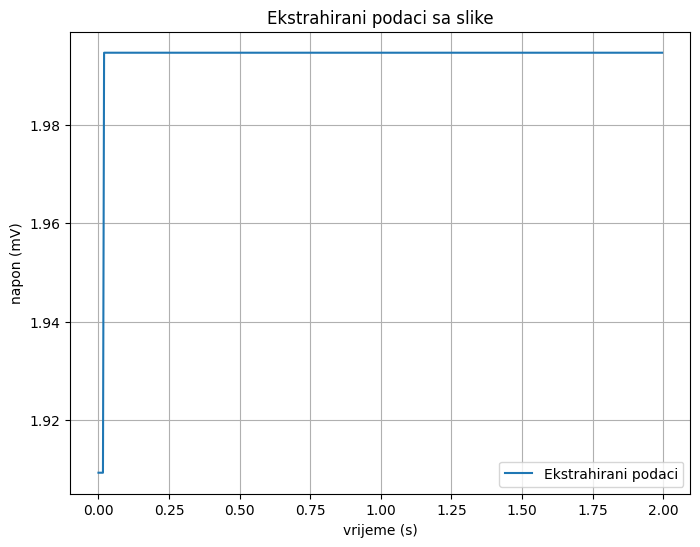

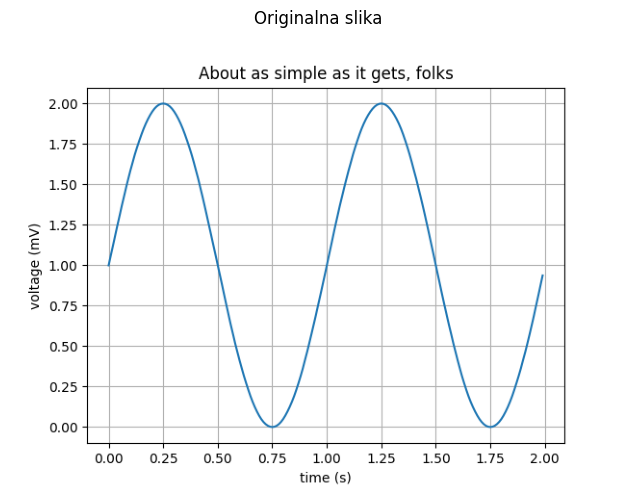

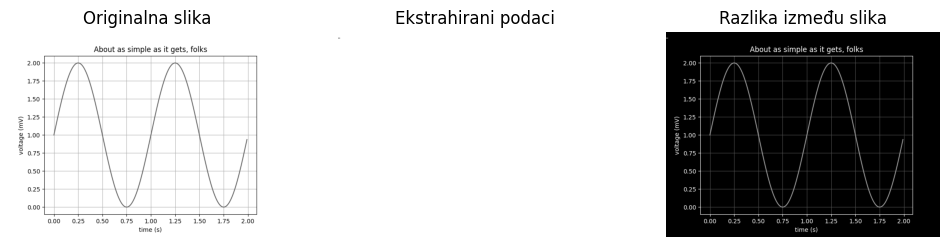

Mean Squared Error (MSE): 9.145227864583333
Structural Similarity Index (SSIM): 0.7091319658056952


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from skimage.metrics import structural_similarity as ssim


uploaded = files.upload()
file_name = list(uploaded.keys())[0]
print(f"Prenesena datoteka: {file_name}")
image = cv2.imread(file_name)


if image is None:
    raise ValueError("Nije moguće učitati sliku. Provjeri put do slike.")


plt.figure(figsize=(10, 5))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Originalna slika')
plt.axis('off')
plt.show()


siva = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Thresholding za binarizaciju slike
_, binarna = cv2.threshold(siva, 200, 255, cv2.THRESH_BINARY_INV)

# Detekcija kontura
konture, _ = cv2.findContours(binarna, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Pronalazak pravokutnika koji obuhvaća graf
pravokutnik_grafa = None
for cnt in konture:
    x, y, w, h = cv2.boundingRect(cnt)
    if w > 100 and h > 100:
        pravokutnik_grafa = (x, y, w, h)
        break

if pravokutnik_grafa is None:
    raise ValueError("Nije pronađen pravokutnik koji obuhvaća graf.")

# Izrezivanje područja grafa
x, y, w, h = pravokutnik_grafa
podrucje_grafa = siva[y:y+h, x:x+w]

# Ekstrakcija podataka sa grafa
osa_x = h - 1
osa_y = 0

podaci = []
for col in range(w):
    for row in range(h):
        if podrucje_grafa[row, col] < 128:
            podaci.append((col, osa_x - row))
            break

# Konverzija podataka u odgovarajuće jedinice
podaci = np.array(podaci)
vrijeme = podaci[:, 0] * 2 / w
napon = podaci[:, 1] * 2 / h

# Generiranje grafa iz ekstrahiranih podataka
plt.figure(figsize=(8, 6))
plt.plot(vrijeme, napon, label='Ekstrahirani podaci')
plt.title('Ekstrahirani podaci sa slike')
plt.xlabel('vrijeme (s)')
plt.ylabel('napon (mV)')
plt.legend()
plt.grid(True)

plt.show()

# Prikaz originalne slike ponovo za usporedbu
plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Originalna slika')
plt.axis('off')
plt.show()

# Pretvorba ekstrahiranih podataka u sliku
siva_ekstrahirani = np.full_like(siva, 255)  # Bijela slika
for x, y in podaci:
    siva_ekstrahirani[osa_x - y, x] = 0  # Crna linija

# Izračun razlike između originalne slike i ekstrahiranih podataka
razlika = cv2.absdiff(siva, siva_ekstrahirani)

# Izračunavanje MSE i SSIM
mse = np.mean((siva - siva_ekstrahirani) ** 2)
ssim_index, _ = ssim(siva, siva_ekstrahirani, full=True)

# Prikaz rezultata
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(siva, cmap='gray')
plt.title('Originalna slika')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(siva_ekstrahirani, cmap='gray')
plt.title('Ekstrahirani podaci')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(razlika, cmap='gray')
plt.title('Razlika između slika')
plt.axis('off')

plt.show()

print(f"Mean Squared Error (MSE): {mse}")
print(f"Structural Similarity Index (SSIM): {ssim_index}")
